### COMPONENT TWO (Vehicle Damage Insurance Claim Verification)

Convolutional Neural Network (CNN) model is a category of machine learning model. Specifically, it is a type of deep learning algorithm that is well suited to analysing visual data. CNNs are commonly used to process image and video tasks (Gillis, 2024). In this report, this model will be able to classify various types of damaged vehicles based on images. Moreover, CNN will be capable of distinguishing between fraudulent and non-fraudulent insurance claims based on visual damages of vehicles.  
The best CNN model achieved an accuracy with regularisation methods 0.72, while the better validation accuracy has the model with hyperparameter tunning - 0.67.

#### a. Describe the architecture of the CNN model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.optimize import leastsq
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

      image_id  filename  label
0            1     1.jpg      2
1            2     2.jpg      4
2            3     3.jpg      2
3            4     4.jpg      3
4            5     5.jpg      5
...        ...       ...    ...
7195      7196  7196.jpg      4
7196      7197  7197.jpg      4
7197      7198  7198.jpg      4
7198      7199  7199.jpg      2
7199      7200  7200.jpg      2

[7200 rows x 3 columns]
(7200, 3)
      image_id  filename  label damage_category
0            1     1.jpg      2         scratch
1            2     2.jpg      4            dent
2            3     3.jpg      2         scratch
3            4     4.jpg      3       tire flat
4            5     5.jpg      5   glass shatter
...        ...       ...    ...             ...
7195      7196  7196.jpg      4            dent
7196      7197  7197.jpg      4            dent
7197      7198  7198.jpg      4            dent
7198      7199  7199.jpg      2         scratch
7199      7200  7200.jpg      2         scratch

[720

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,461,190 (9.39 MB)

 Trainable params: 2,461,190 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\sofji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 147s 803ms/step - accuracy: 0.3066 - loss: 1.5956 - val_accuracy: 0.4389 - val_loss: 1.3291
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 143s 793ms/step - accuracy: 0.4055 - loss: 1.3792 - val_accuracy: 0.4917 - val_loss: 1.2043
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 135s 748ms/step - accuracy: 0.4423 - loss: 1.2792 - val_accuracy: 0.5063 - val_loss: 1.1619
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 136s 757ms/step - accuracy: 0.4462 - loss: 1.2807 - val_accuracy: 0.5049 - val_loss: 1.2123
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 141s 785ms/step - accuracy: 0.4710 - loss: 1.2480 - val_accuracy: 0.5201 - val_loss: 1.1148
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 746ms/step - accuracy: 0.4914 - loss: 1.1779 - val_accuracy: 0.4958 - val_loss: 1.1549
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 131s 725ms/step - accuracy: 0.4964 - loss: 1.1641 - val_accuracy: 0.5257 - val_loss: 1.1196
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 715ms/step - accuracy: 0.5293 -

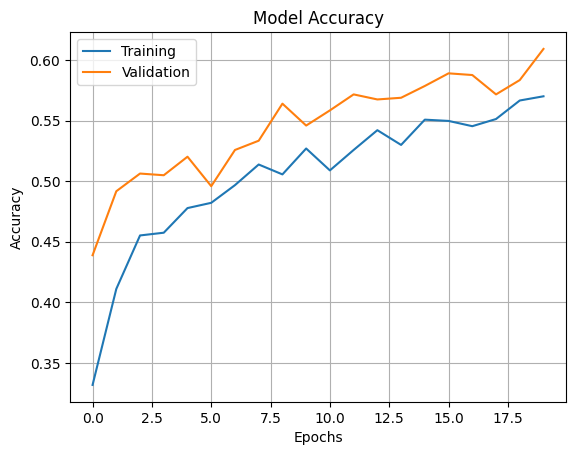

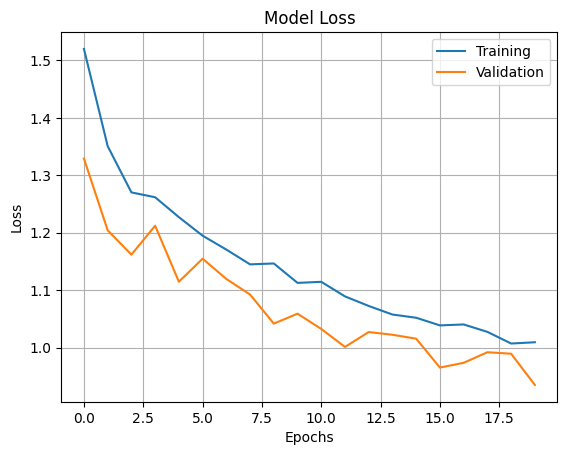

45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 367ms/step


<Figure size 960x720 with 0 Axes>

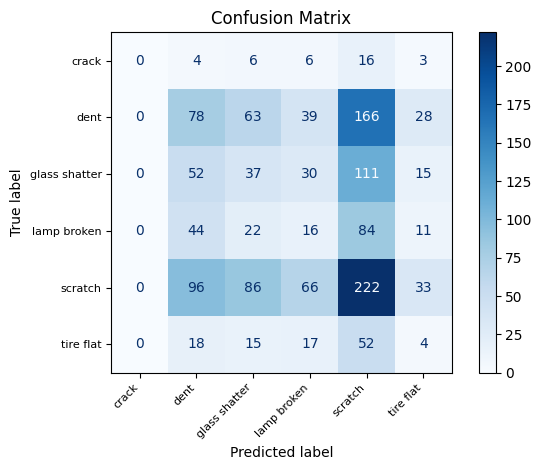

In [2]:
# Load the dataset
df_train = pd.read_csv(r"D:\OneDrive - hull.ac.uk\AI\Portfolio\images\train\train\train.csv")
print(df_train)
print(df_train.shape)

# Identify the damage to each image
def mapping(label):
    if label == 1:
        return 'crack'
    elif label == 2:
        return 'scratch'
    elif label == 3:
        return 'tire flat'
    elif label == 4:
        return 'dent'
    elif label == 5:
        return 'glass shatter'
    elif label == 6:
        return 'lamp broken'
    else:
        return 'other'

df_train['damage_category'] = df_train['label'].map(mapping)
print(df_train)

# Split the data
df_train_split, val_data_split = train_test_split(df_train, test_size=0.2, random_state=42)

# Image directory
image_dir = r"D:\OneDrive - hull.ac.uk\AI\Portfolio\images\train\train\images"

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False, shear_range=0.1, zoom_range=0.1, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory=image_dir, x_col='filename', y_col='damage_category', target_size=(150, 150), batch_size=32, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory=image_dir, x_col='filename', y_col='damage_category', target_size=(150, 150), batch_size=32, class_mode='categorical', subset='validation')

# Build the CNN model
model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Print model summary
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=20)

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# A Confusion Matrix to predict the class labels for the images in the testing set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the validation generator
y_pred = model.predict(val_generator)
pred_class = np.argmax(y_pred, axis=1)

# Get true numerical labels from the validation generator
true_labels_encoded = val_generator.classes

# Get the mapping of class indices to names
class_indices = val_generator.class_indices
display_labels = list(class_indices.keys())

# Generate the confusion matrix for the validation set
con_mat = confusion_matrix(true_labels_encoded, pred_class)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6), dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

According to the Confusion Matrix, for this model it is difficult to predict a crack (0), glass shatter (37), lamp broken (16), tire flat (4). Better prediction was for scratch (222) and dent (78). Based on these results, the prediction accuracy is low and needs improvement. 

As we can see, this model performs with an accuracy of 0.5733 and validation accuracy of 0.6090 which means that the model is learning but needs improvements and optimization. The difference between the training and validation loss suggests that the model is starting to understand the training data. As for loss and validation loss, both indicate stable learning process. Along with this, based on Figures 1 and 2, overfitting is not present because validation accuracy is lower than training. However, the model needs some additional hyperparameters.

#### b. Regularisation methods

Regularization is a technique used in machine learning and deep learning to prevent overfitting and improve a model’s generalization performance. It involves adding a penalty term to the loss function during training. Regularization in deep learning methods includes L1 and L2 regularization, dropout, early stopping, and more (Shubham, 2024).  
The performance was improved significantly with additional regularisation methods: Batch Normalization, L2 regularization (0.0001) and Early Stopping (10).

      image_id  filename  label
0            1     1.jpg      2
1            2     2.jpg      4
2            3     3.jpg      2
3            4     4.jpg      3
4            5     5.jpg      5
...        ...       ...    ...
7195      7196  7196.jpg      4
7196      7197  7197.jpg      4
7197      7198  7198.jpg      4
7198      7199  7199.jpg      2
7199      7200  7200.jpg      2

[7200 rows x 3 columns]
(7200, 3)
      image_id  filename  label damage_category
0            1     1.jpg      2         scratch
1            2     2.jpg      4            dent
2            3     3.jpg      2         scratch
3            4     4.jpg      3       tire flat
4            5     5.jpg      5   glass shatter
...        ...       ...    ...             ...
7195      7196  7196.jpg      4            dent
7196      7197  7197.jpg      4            dent
7197      7198  7198.jpg      4            dent
7198      7199  7199.jpg      2         scratch
7199      7200  7200.jpg      2         scratch

[720

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,818,502 (26.01 MB)

 Trainable params: 6,816,518 (26.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

C:\Users\sofji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.3458 - loss: 2.5317 - val_accuracy: 0.3306 - val_loss: 4.0727
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.4645 - loss: 1.6684 - val_accuracy: 0.3792 - val_loss: 2.1915
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.5105 - loss: 1.4833 - val_accuracy: 0.4437 - val_loss: 1.6146
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.5321 - loss: 1.3816 - val_accuracy: 0.4403 - val_loss: 1.6972
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.5510 - loss: 1.3376 - val_accuracy: 0.5569 - val_loss: 1.2889
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.5720 - loss: 1.2566 - val_accuracy: 0.5792 - val_loss: 1.2711
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.6039 - loss: 1.2528 - val_accuracy: 0.4299 - val_loss: 1.6713
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.5654 - loss: 1.3130 - val_accu

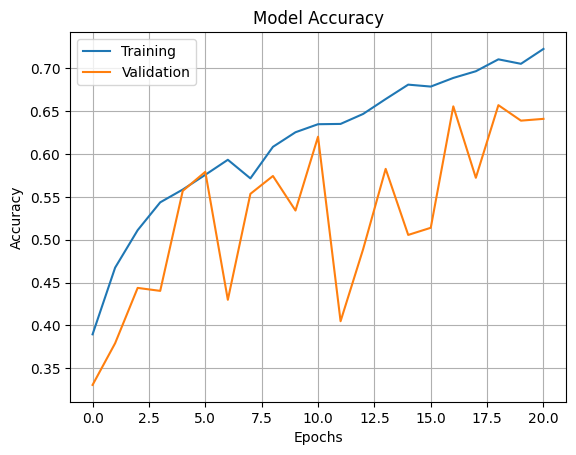

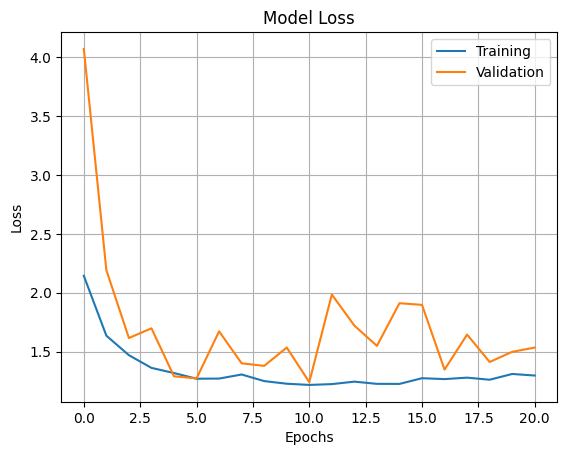

45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 454ms/step


<Figure size 960x720 with 0 Axes>

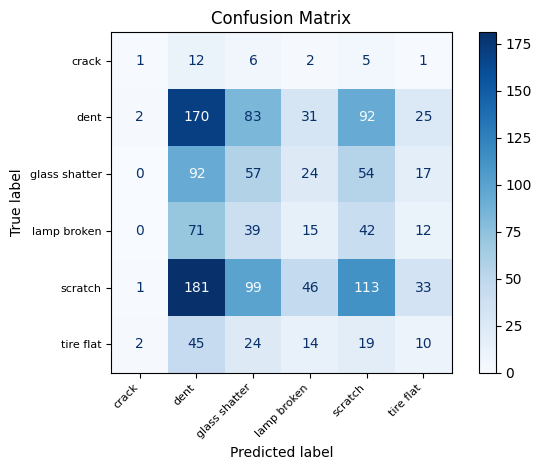

In [4]:
# Load the dataset
df_train = pd.read_csv(r"D:\OneDrive - hull.ac.uk\AI\Portfolio\images\train\train\train.csv")
print(df_train)
print(df_train.shape)

# Identify the damage to each image
def mapping(label):
    if label == 1:
        return 'crack'
    elif label == 2:
        return 'scratch'
    elif label == 3:
        return 'tire flat'
    elif label == 4:
        return 'dent'
    elif label == 5:
        return 'glass shatter'
    elif label == 6:
        return 'lamp broken'
    else:
        return 'other'

df_train['damage_category'] = df_train['label'].map(mapping)
print(df_train)

# Split the data
df_train_split, val_data_split = train_test_split(df_train, test_size=0.2, random_state=42)

# Image directory
image_dir = r"D:\OneDrive - hull.ac.uk\AI\Portfolio\images\train\train\images"

# ImageDataGenerator (no validation_split here)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False, shear_range=0.1, zoom_range=0.1, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(dataframe=df_train_split, directory=image_dir, x_col='filename', y_col='damage_category', target_size=(150, 150), class_mode='categorical')

val_generator = train_datagen.flow_from_dataframe(dataframe=val_data_split, directory=image_dir, x_col='filename', y_col='damage_category', target_size=(150, 150), class_mode='categorical')

# Build the CNN model with Batch Normalization and L2 Regularization
model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.summary()
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_generator, validation_data=val_generator, epochs=30, verbose="auto", callbacks=[early_stopping])

history_df = pd.DataFrame(history.history)
print(history_df)

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the validation generator
y_pred = model.predict(val_generator)
pred_class = np.argmax(y_pred, axis=1)

# Get true numerical labels from the validation generator
true_labels_encoded = val_generator.classes

# Get the mapping of class indices to names
class_indices = val_generator.class_indices
display_labels = list(class_indices.keys())

# Generate the confusion matrix for the validation set
con_mat = confusion_matrix(true_labels_encoded, pred_class)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6), dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

According to the findings, the model demonstrates a high level of accuracy on the training data. However, the validation results indicate overfitting and validation accuracy is almost at the same level like in the Figure 1, 0.60-0.64. Moreover, the validation accuracy is declining and does not align with the training accuracy. As for validation loss, it begins to increase.  
Confusion matrix shows some similarity between a tire flat, and a lamp broken.

#### c. Hyperparameter Tuning

Hyperparameter tuning is the practice of identifying and selecting the optimal hyperparameters for use in training a machine learning model. When performed correctly, hyperparameter tuning minimizes the loss function of a machine learning model, which means that the model performance is trained to be as accurate as possible (Belcic and Stryker, 2024).  
In this part, we added and tested some additional hyperparameters, such as Adam optimizer, Batch Size, Dropout rate, Early Stopping and Epochs. Based on the findings, even additional parameters could not help to improve performance of the model and achieve accuracy 0.9. Moreover, overfitting was presented. 

      image_id  filename  label
0            1     1.jpg      2
1            2     2.jpg      4
2            3     3.jpg      2
3            4     4.jpg      3
4            5     5.jpg      5
...        ...       ...    ...
7195      7196  7196.jpg      4
7196      7197  7197.jpg      4
7197      7198  7198.jpg      4
7198      7199  7199.jpg      2
7199      7200  7200.jpg      2

[7200 rows x 3 columns]
(7200, 3)
      image_id  filename  label damage_category
0            1     1.jpg      2         scratch
1            2     2.jpg      4            dent
2            3     3.jpg      2         scratch
3            4     4.jpg      3       tire flat
4            5     5.jpg      5   glass shatter
...        ...       ...    ...             ...
7195      7196  7196.jpg      4            dent
7196      7197  7197.jpg      4            dent
7197      7198  7198.jpg      4            dent
7198      7199  7199.jpg      2         scratch
7199      7200  7200.jpg      2         scratch

[720

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,818,502 (26.01 MB)

 Trainable params: 6,816,518 (26.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

C:\Users\sofji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.3349 - loss: 2.6231 - val_accuracy: 0.3285 - val_loss: 3.9843
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4358 - loss: 1.7832 - val_accuracy: 0.3625 - val_loss: 2.1209
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.4947 - loss: 1.4768 - val_accuracy: 0.4667 - val_loss: 1.5174
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.5293 - loss: 1.3436 - val_accuracy: 0.4257 - val_loss: 1.5710
Epoch 5/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.5501 - loss: 1.2900 - val_accuracy: 0.4146 - val_loss: 1.6832
Epoch 6/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.5641 - loss: 1.2447 - val_accuracy: 0.5299 - val_loss: 1.3823
Epoch 7/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.5859 - loss: 1.1914 - val_accuracy: 0.4375 - val_loss: 1.7118
Epoch 8/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.6222 - loss: 1.1789 - val_accu

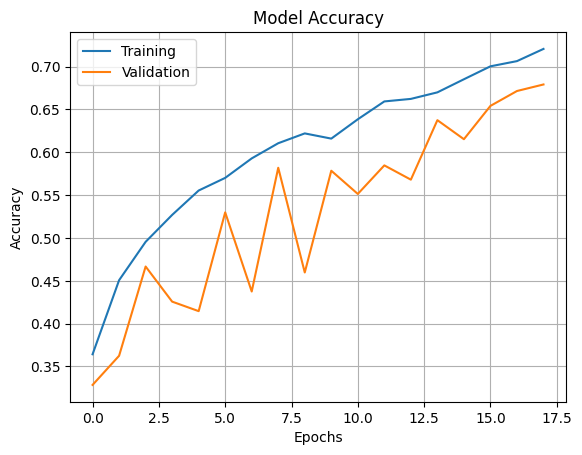

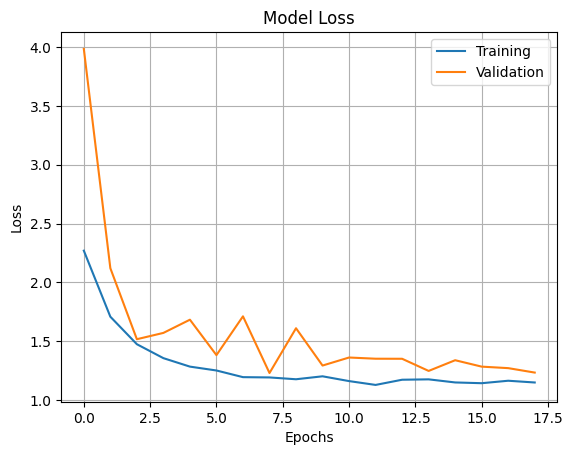

45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step


<Figure size 960x720 with 0 Axes>

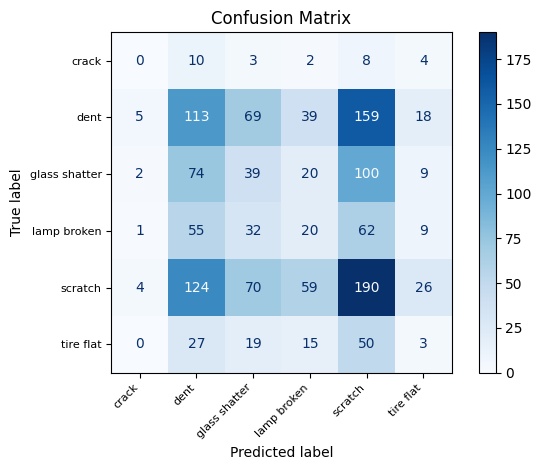

In [3]:
# Load the dataset
df_train = pd.read_csv(r"D:\OneDrive - hull.ac.uk\AI\Portfolio\images\train\train\train.csv")
print(df_train)
print(df_train.shape)

# Identify the damage to each image
def mapping(label):
    if label == 1:
        return 'crack'
    elif label == 2:
        return 'scratch'
    elif label == 3:
        return 'tire flat'
    elif label == 4:
        return 'dent'
    elif label == 5:
        return 'glass shatter'
    elif label == 6:
        return 'lamp broken'
    else:
        return 'other'

df_train['damage_category'] = df_train['label'].map(mapping)
print(df_train)

# Split the data
df_train_split, val_data_split = train_test_split(df_train, test_size=0.2, random_state=42)

# Image directory
image_dir = r"D:\OneDrive - hull.ac.uk\AI\Portfolio\images\train\train\images"

# ImageDataGenerator (no validation_split here)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False, shear_range=0.1, zoom_range=0.1, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(dataframe=df_train_split, directory=image_dir, x_col='filename', y_col='damage_category', target_size=(150, 150), class_mode='categorical')

val_generator = train_datagen.flow_from_dataframe(dataframe=val_data_split, directory=image_dir, x_col='filename', y_col='damage_category', target_size=(150, 150), class_mode='categorical')

# Build the CNN model with Batch Normalization and L2 Regularization
model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(6, activation='softmax'))

model.summary()
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_generator, validation_data=val_generator, epochs=25, verbose="auto", callbacks=[early_stopping])

history_df = pd.DataFrame(history.history)
print(history_df)

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the validation generator
y_pred = model.predict(val_generator)
pred_class = np.argmax(y_pred, axis=1)

# Get true numerical labels from the validation generator
true_labels_encoded = val_generator.classes

# Get the mapping of class indices to names
class_indices = val_generator.class_indices
display_labels = list(class_indices.keys())

# Generate the confusion matrix for the validation set
con_mat = confusion_matrix(true_labels_encoded, pred_class)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6), dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

Based on the data, the model performs almost the same results as the model with regularisation methods. However, the following adjustments were improved validation accuracy: Adam optimizer (0.001); L2 regularization (0.0001), Batch Size (Batch Normalization), Dropout (0.5), Early Stopping (10), Epochs (25).  

### Overfitting  
Unfortunately, there were two models with overfitting, when we used regularisation methods and hyperparameters due to the fact that the values were better on the training data than on the validation data. The results were good but as for validation results, they were overfitting due to fluctuation in validation accuracy.

# Discussion  
The CNN models presented almost the same results in the validation accuracy. The first model without parameters achieved the accuracy of 0.60, the second one is 0.64, and the third one is 0.67.  
Moreover, a lot of hyperparameters were tested, for instance, the Adam optimizer: from 0.1 to 0.0001; Batch size: from 16 to 512; Dropout: from 0.3 to 0.6; Early stopping: from 5 to 20; L2 regularization: from 0.01 to 0.0001; Epoch: from 15 to 40. The best result achieved the model with hyperparameter tuning:  

•	Training accuracy: 0.7206  
•	Validation accuracy: 0.6791  

Confusion matrix was applied to all models to show how they can distinguish different classes (crack, scratch, tire flat, etc.). Unfortunately, based on the results, for each model it was difficult due to similarities of damages or lack of data to analyse it. 

# Conclusion  
In conclusion, in this report we analysed three CNN models to classify different types of damaged vehicles based on images. The aim of this report is to distinguish between fraudulent and non-fraudulent insurance claims. Three models were created to achieve the best results: model with basic architecture, with regularisation methods and with hyperparameter tuning.  
As for the results, the model with hyperparameter tuning was better, achieving the validation accuracy of 0.6791. The best training accuracy achieved the model with regularisation methods - 0.7225. However, the overfitting was present in both models.   
According to these findings, it is important to optimise the model by using regularisation methods and hyperparameters in solving such real-world issues as detection fraudulent and non-fraudulent insurance claims. This CNN model illustrates a potential growth in learning based on the images.